# 연습 문제 7장 해답

#### 연습 문제 7.1.1의 답

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
sy = pd.Series(iris.target, dtype="category")
sy = sy.cat.rename_categories(iris.target_names)
df['species'] = sy

(1) 꽃잎 길이의 분포는 다봉분포다.

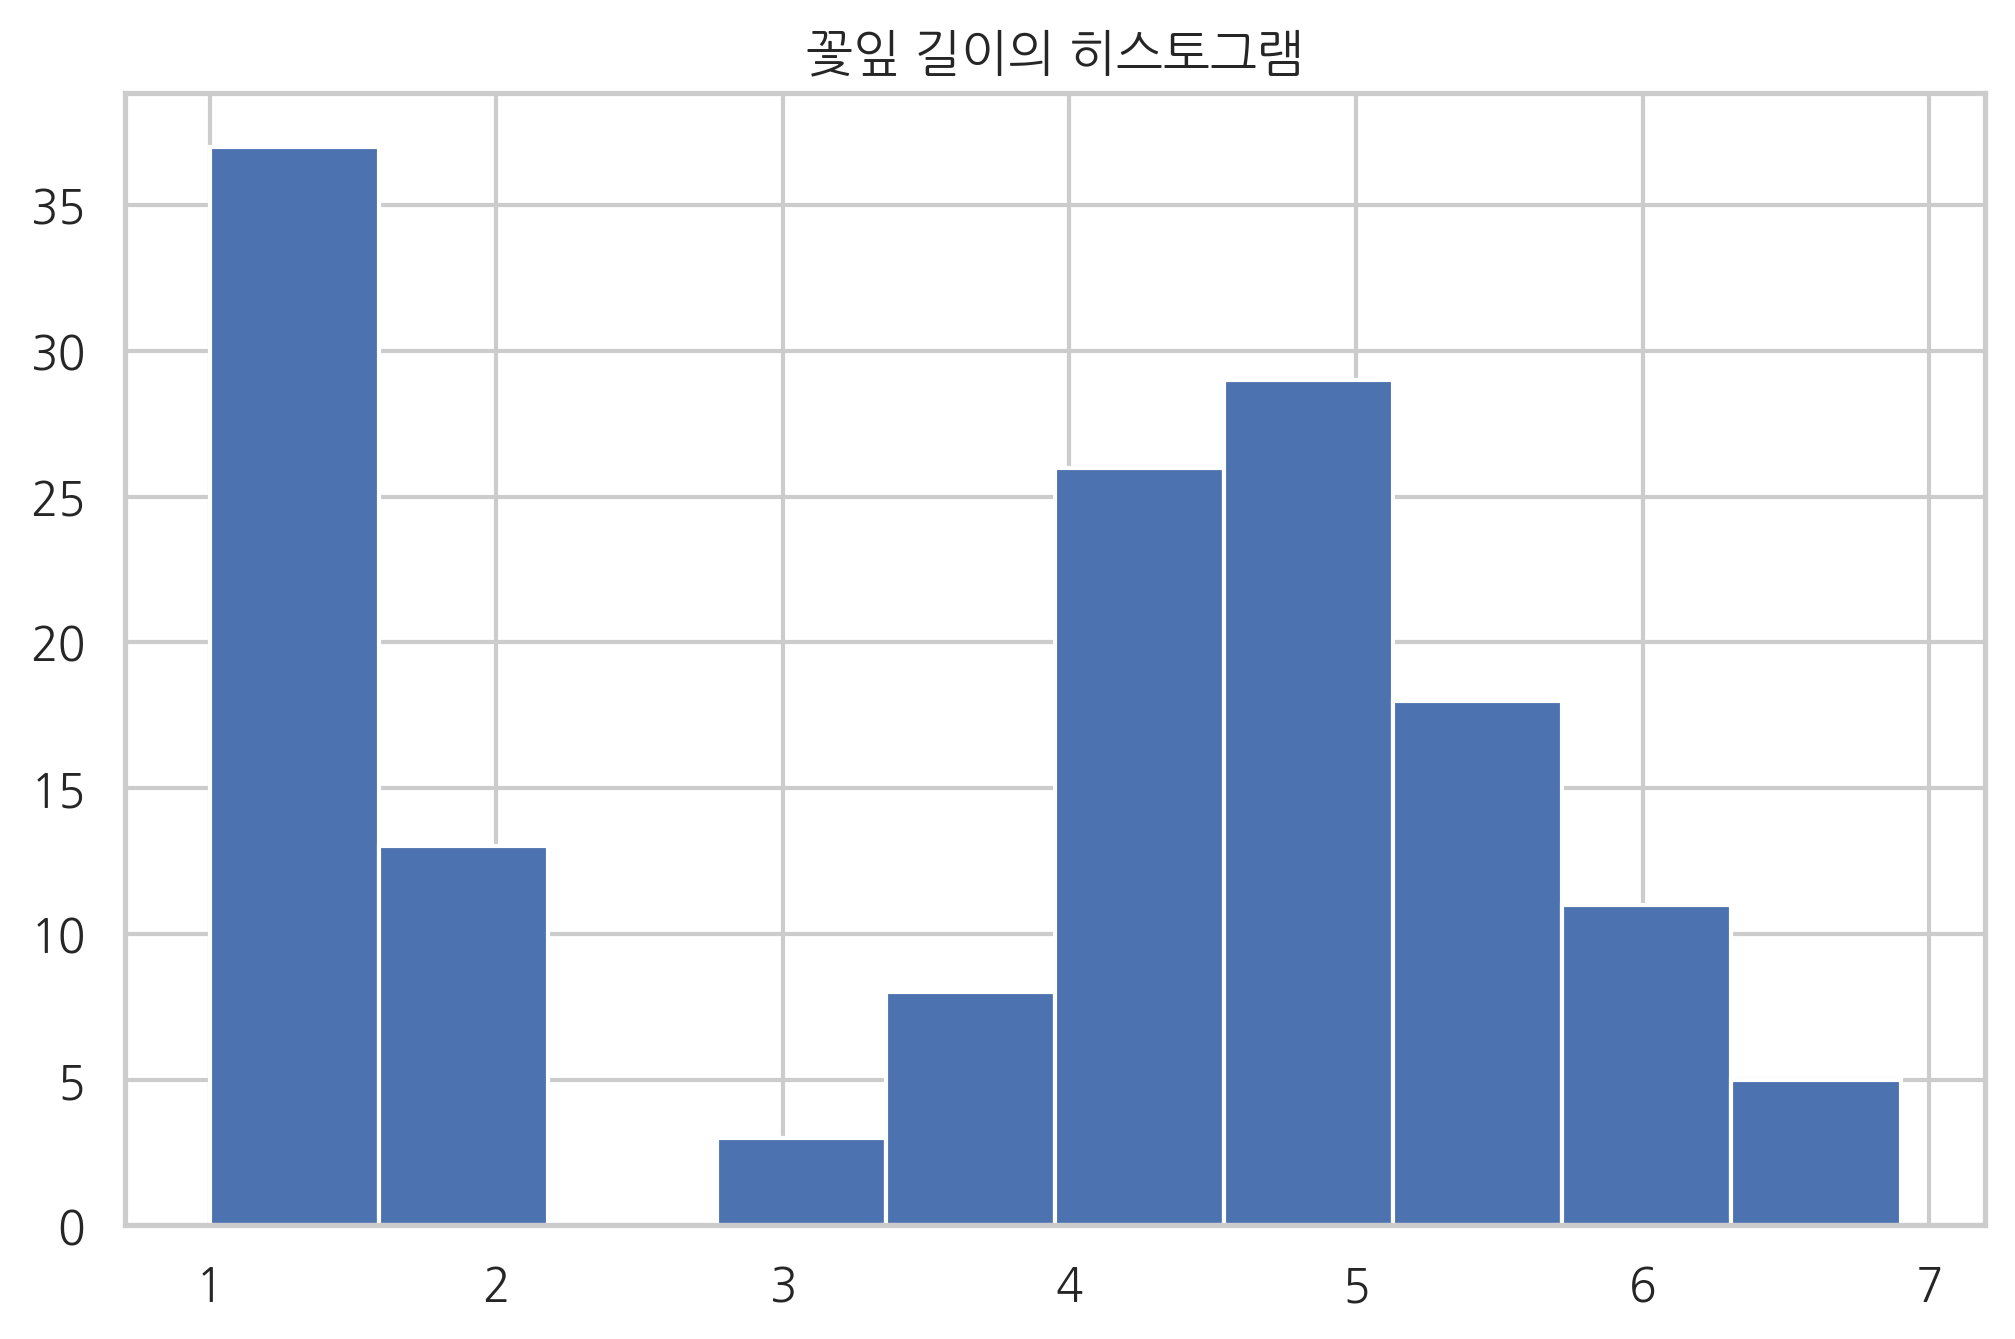

In [2]:
df["petal length (cm)"].hist()
plt.title("꽃잎 길이의 히스토그램")
plt.show()

(2) setosa 종의 꽃잎 길이는 단봉분포다.

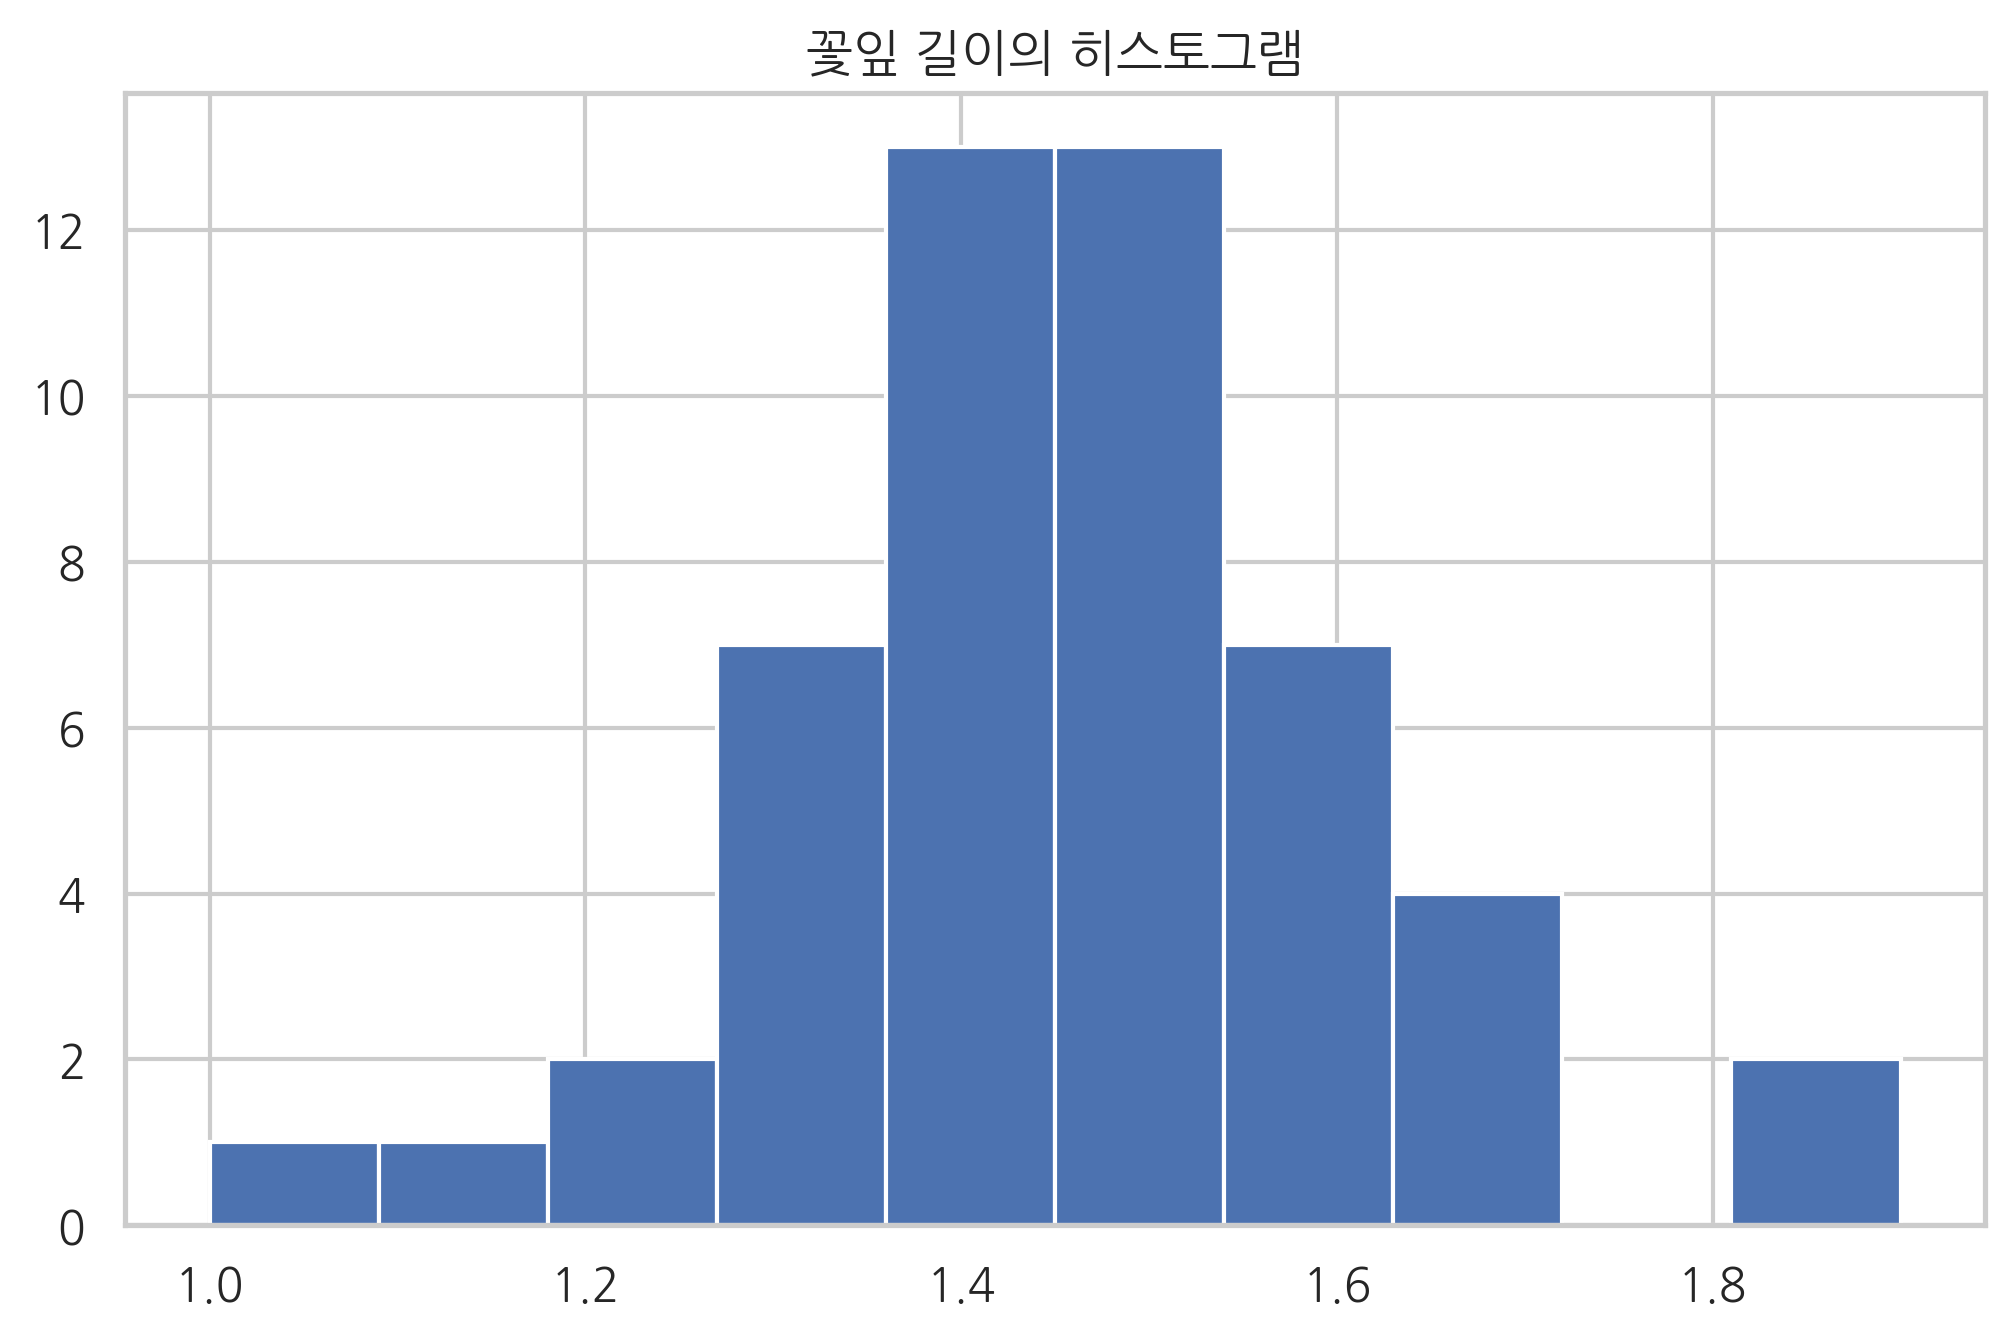

In [3]:
df[df.species == "setosa"]["petal length (cm)"].hist()
plt.title("꽃잎 길이의 히스토그램")
plt.show()

#### 연습 문제 7.1.2의 답

In [4]:
x = df[df.species == "virginica"]["petal length (cm)"]

def sample_statistics(x, n, x_min=0, x_max=10):
    bins = np.linspace(x_min, x_max, n + 1)
    ns, _ = np.histogram(x, bins=bins)

    sample_mean = np.mean(x)
    sample_median = np.median(x)
    mode_index = np.argmax(ns)
    sample_mode = 0.5 * (bins[mode_index] + bins[mode_index + 1])
    print("구간이 {}개일 때".format(n))
    print("표본평균", sample_mean)
    print("표본중앙값", sample_median)
    print("표본최빈값", sample_mode)
    
    sns.distplot(x, bins=bins)
    plt.axvline(sample_mean, c='k', ls=":", label="표본평균")
    plt.axvline(sample_median, c='k', ls="--", label="표본중앙값")
    plt.axvline(sample_mode, c='k', ls="-", label="표본최빈값")
    plt.title("표본평균, 표본중앙값, 표본최빈값의 차이")
    plt.xlabel("x")
    plt.legend()
    plt.show()

구간이 10개일 때
표본평균 5.552
표본중앙값 5.55
표본최빈값 5.5


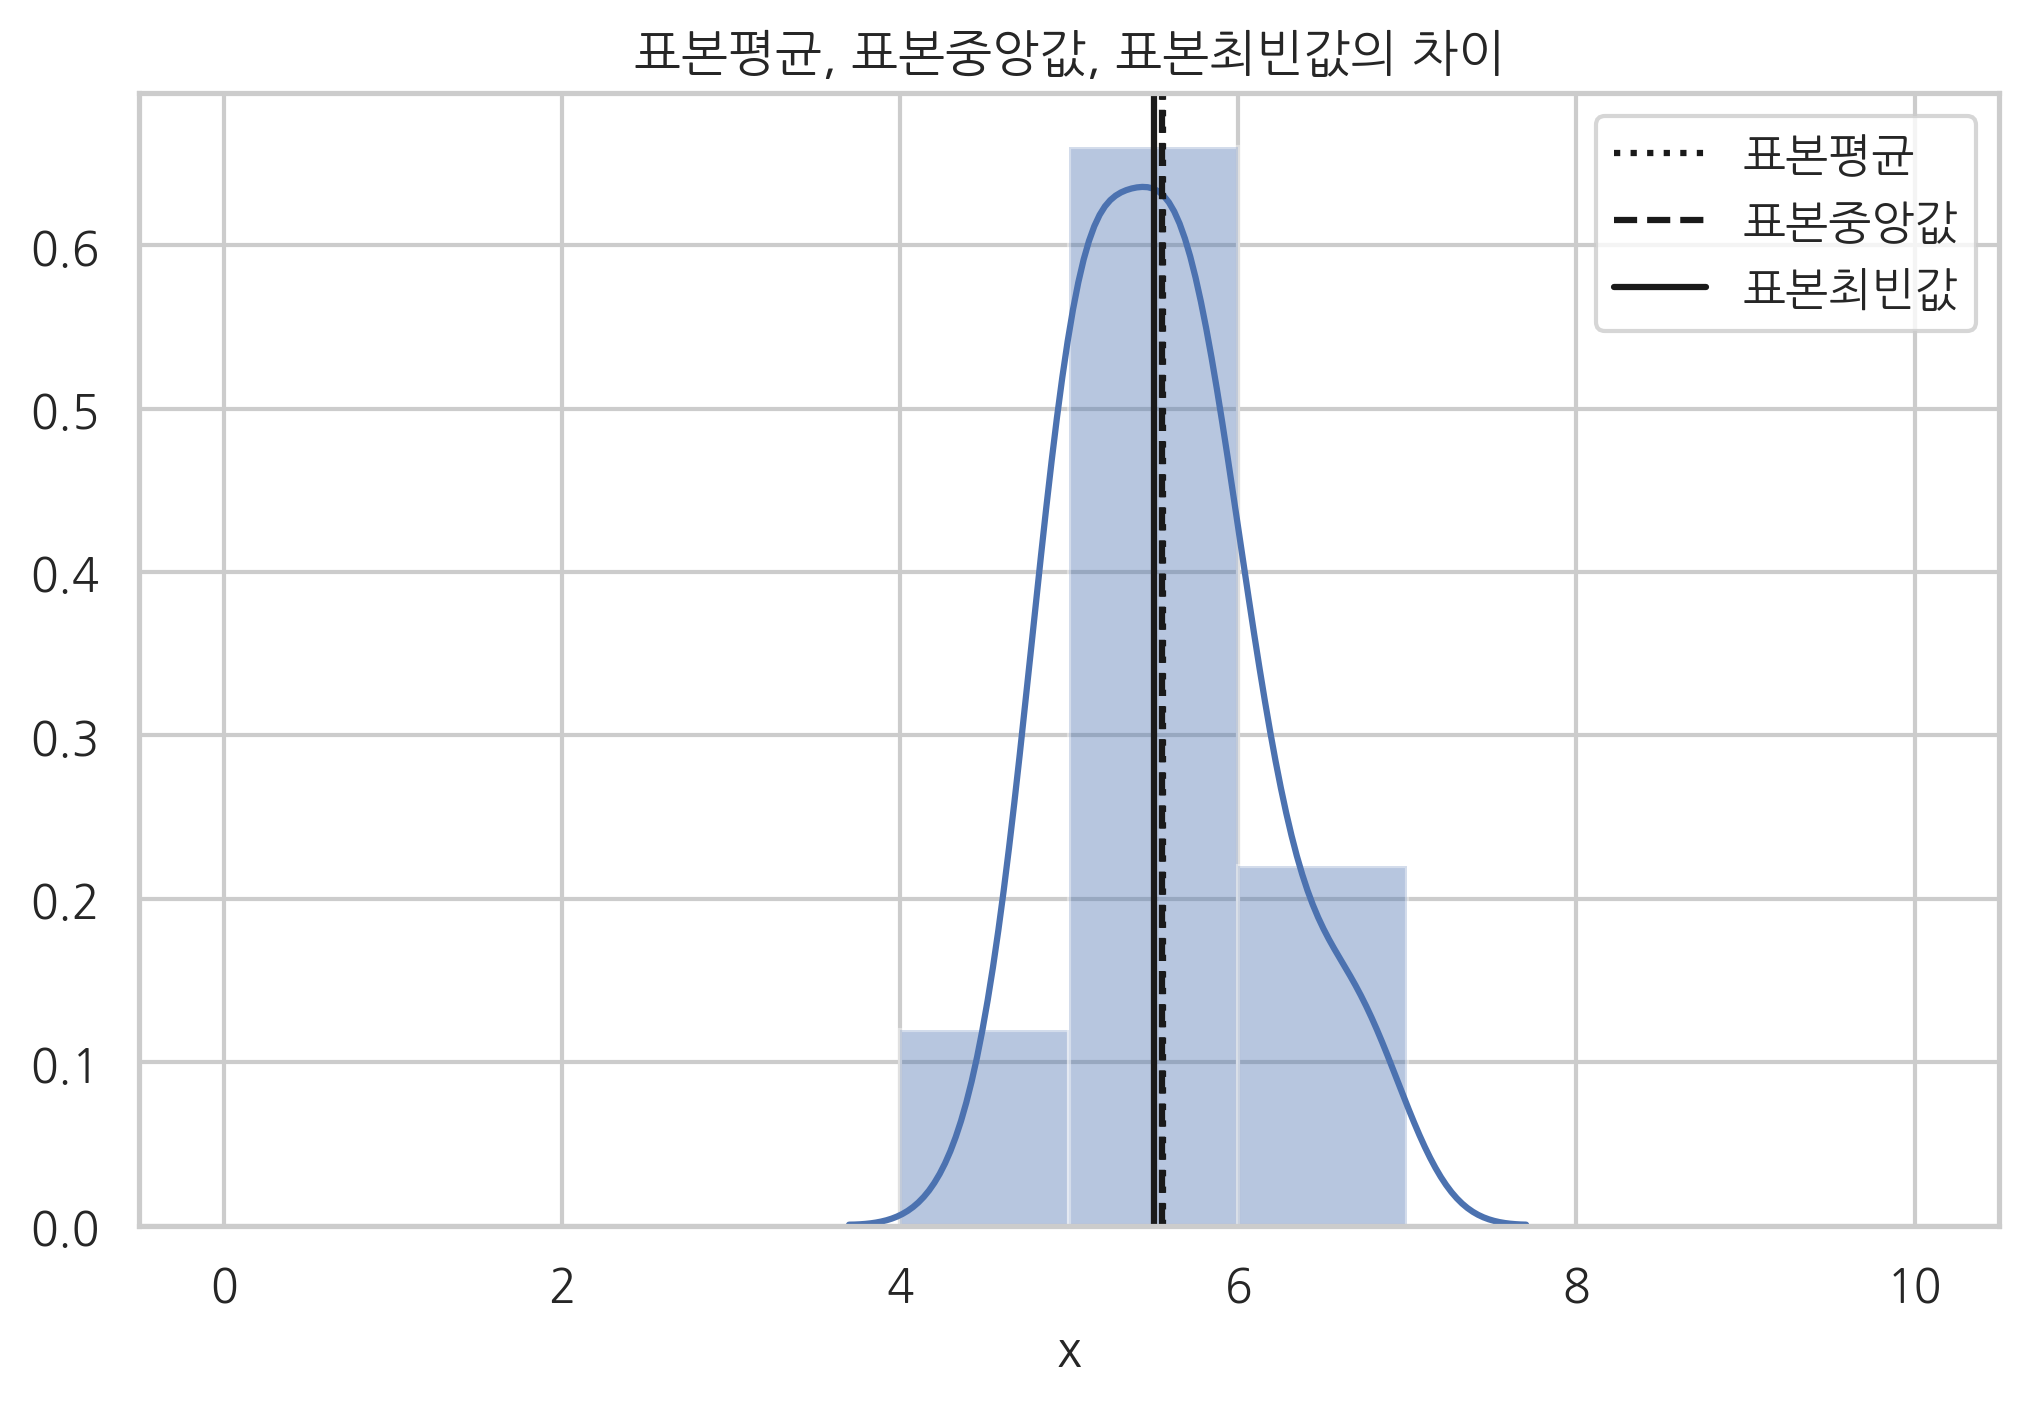

In [5]:
sample_statistics(x, 10)

구간이 50개일 때
표본평균 5.552
표본중앙값 5.55
표본최빈값 5.5


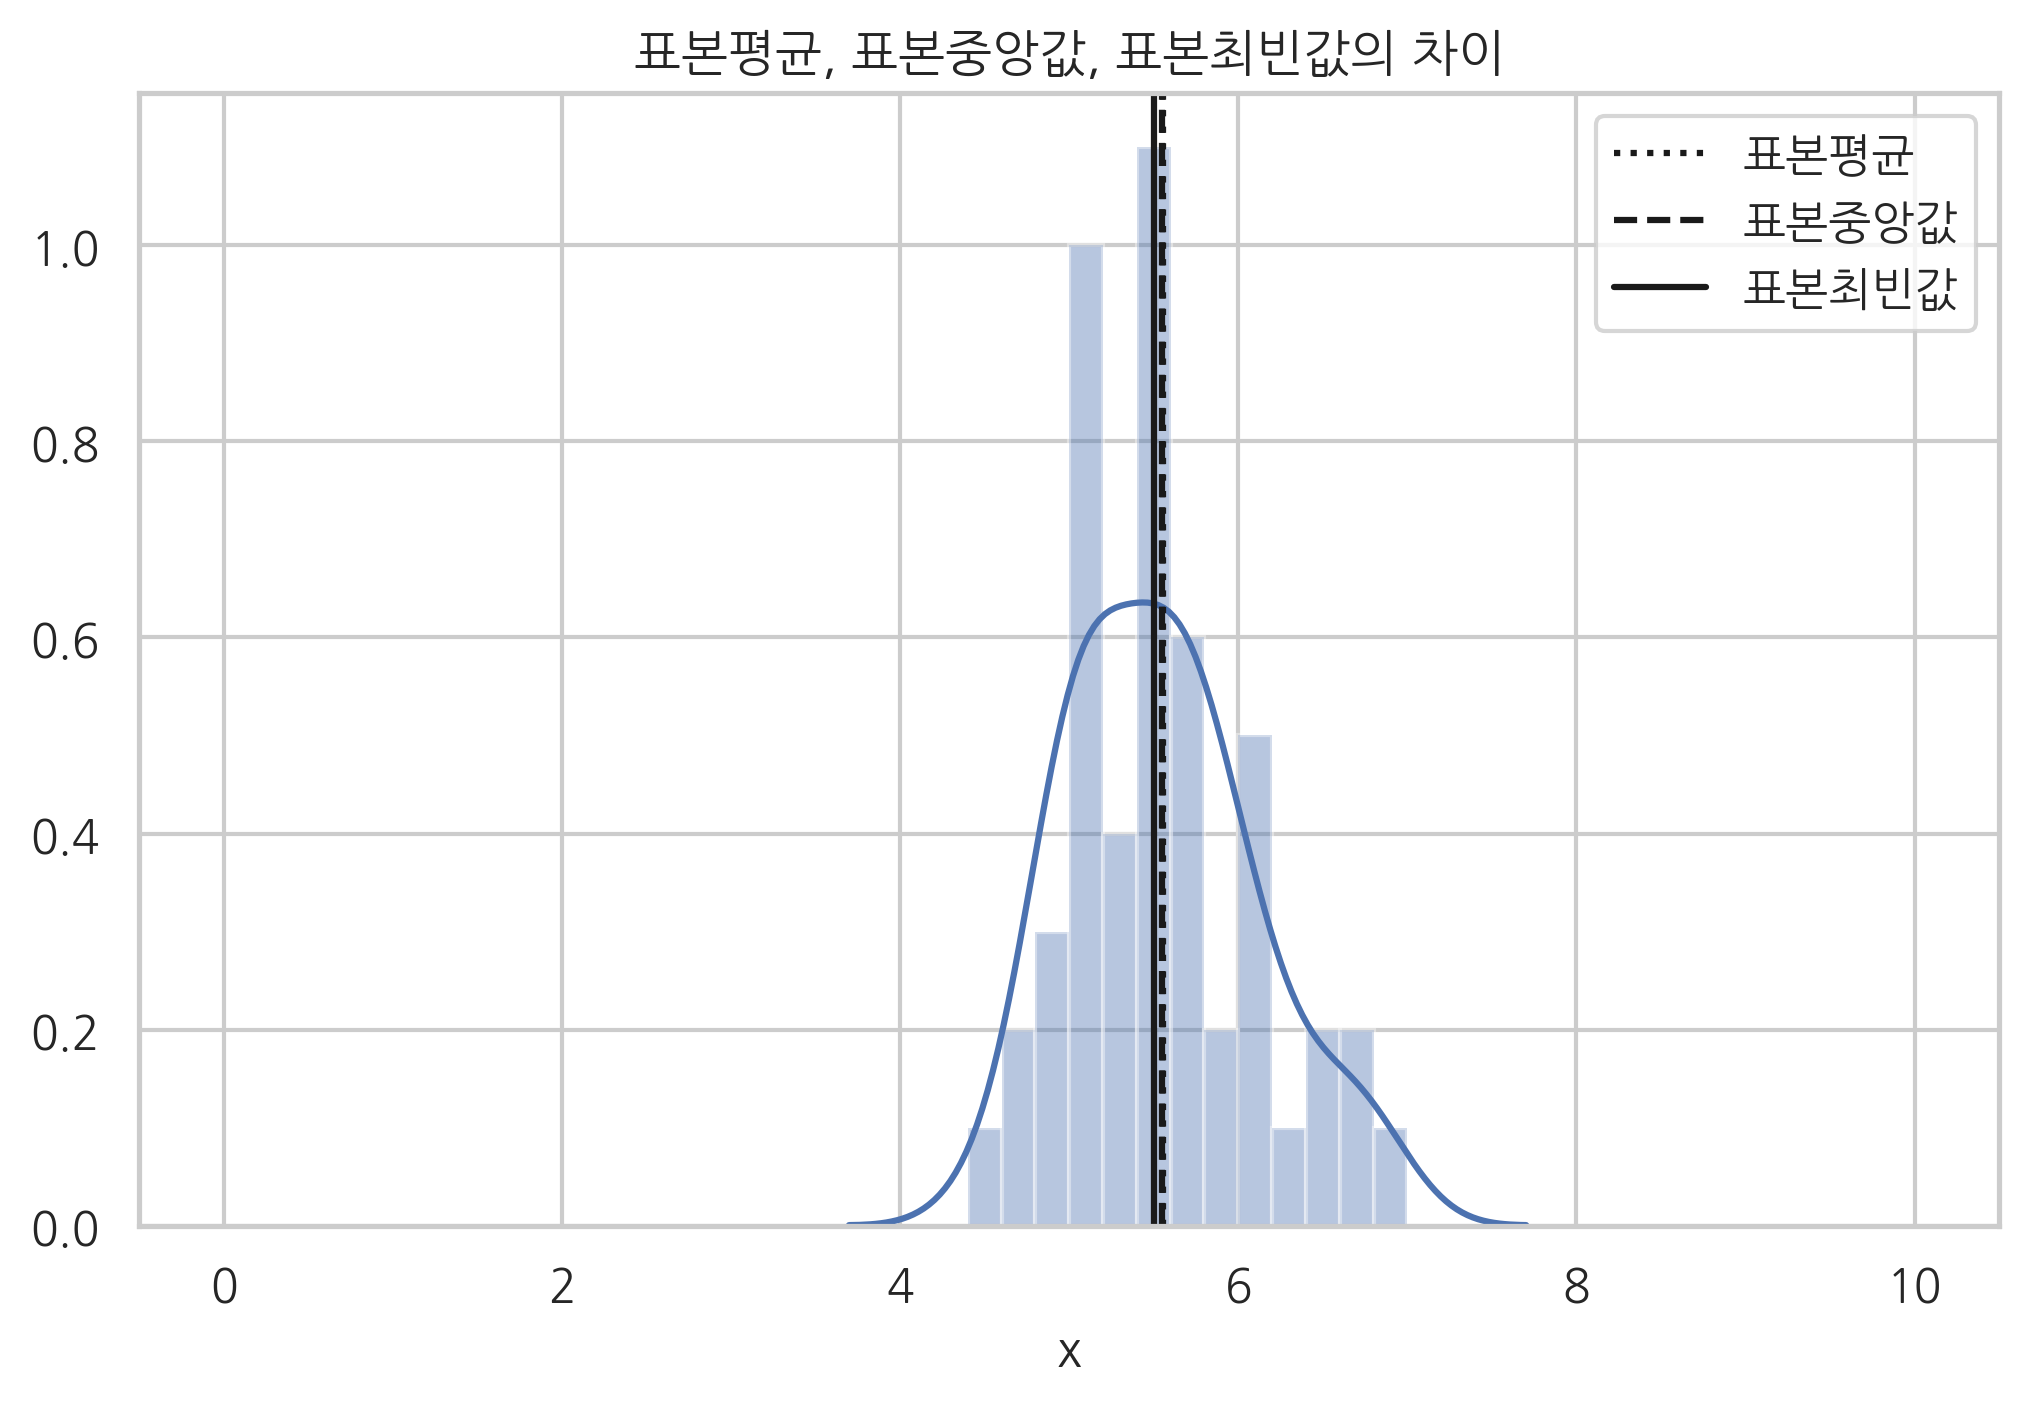

In [6]:
sample_statistics(x, 50)

구간이 100개일 때
표본평균 5.552
표본중앙값 5.55
표본최빈값 5.050000000000001


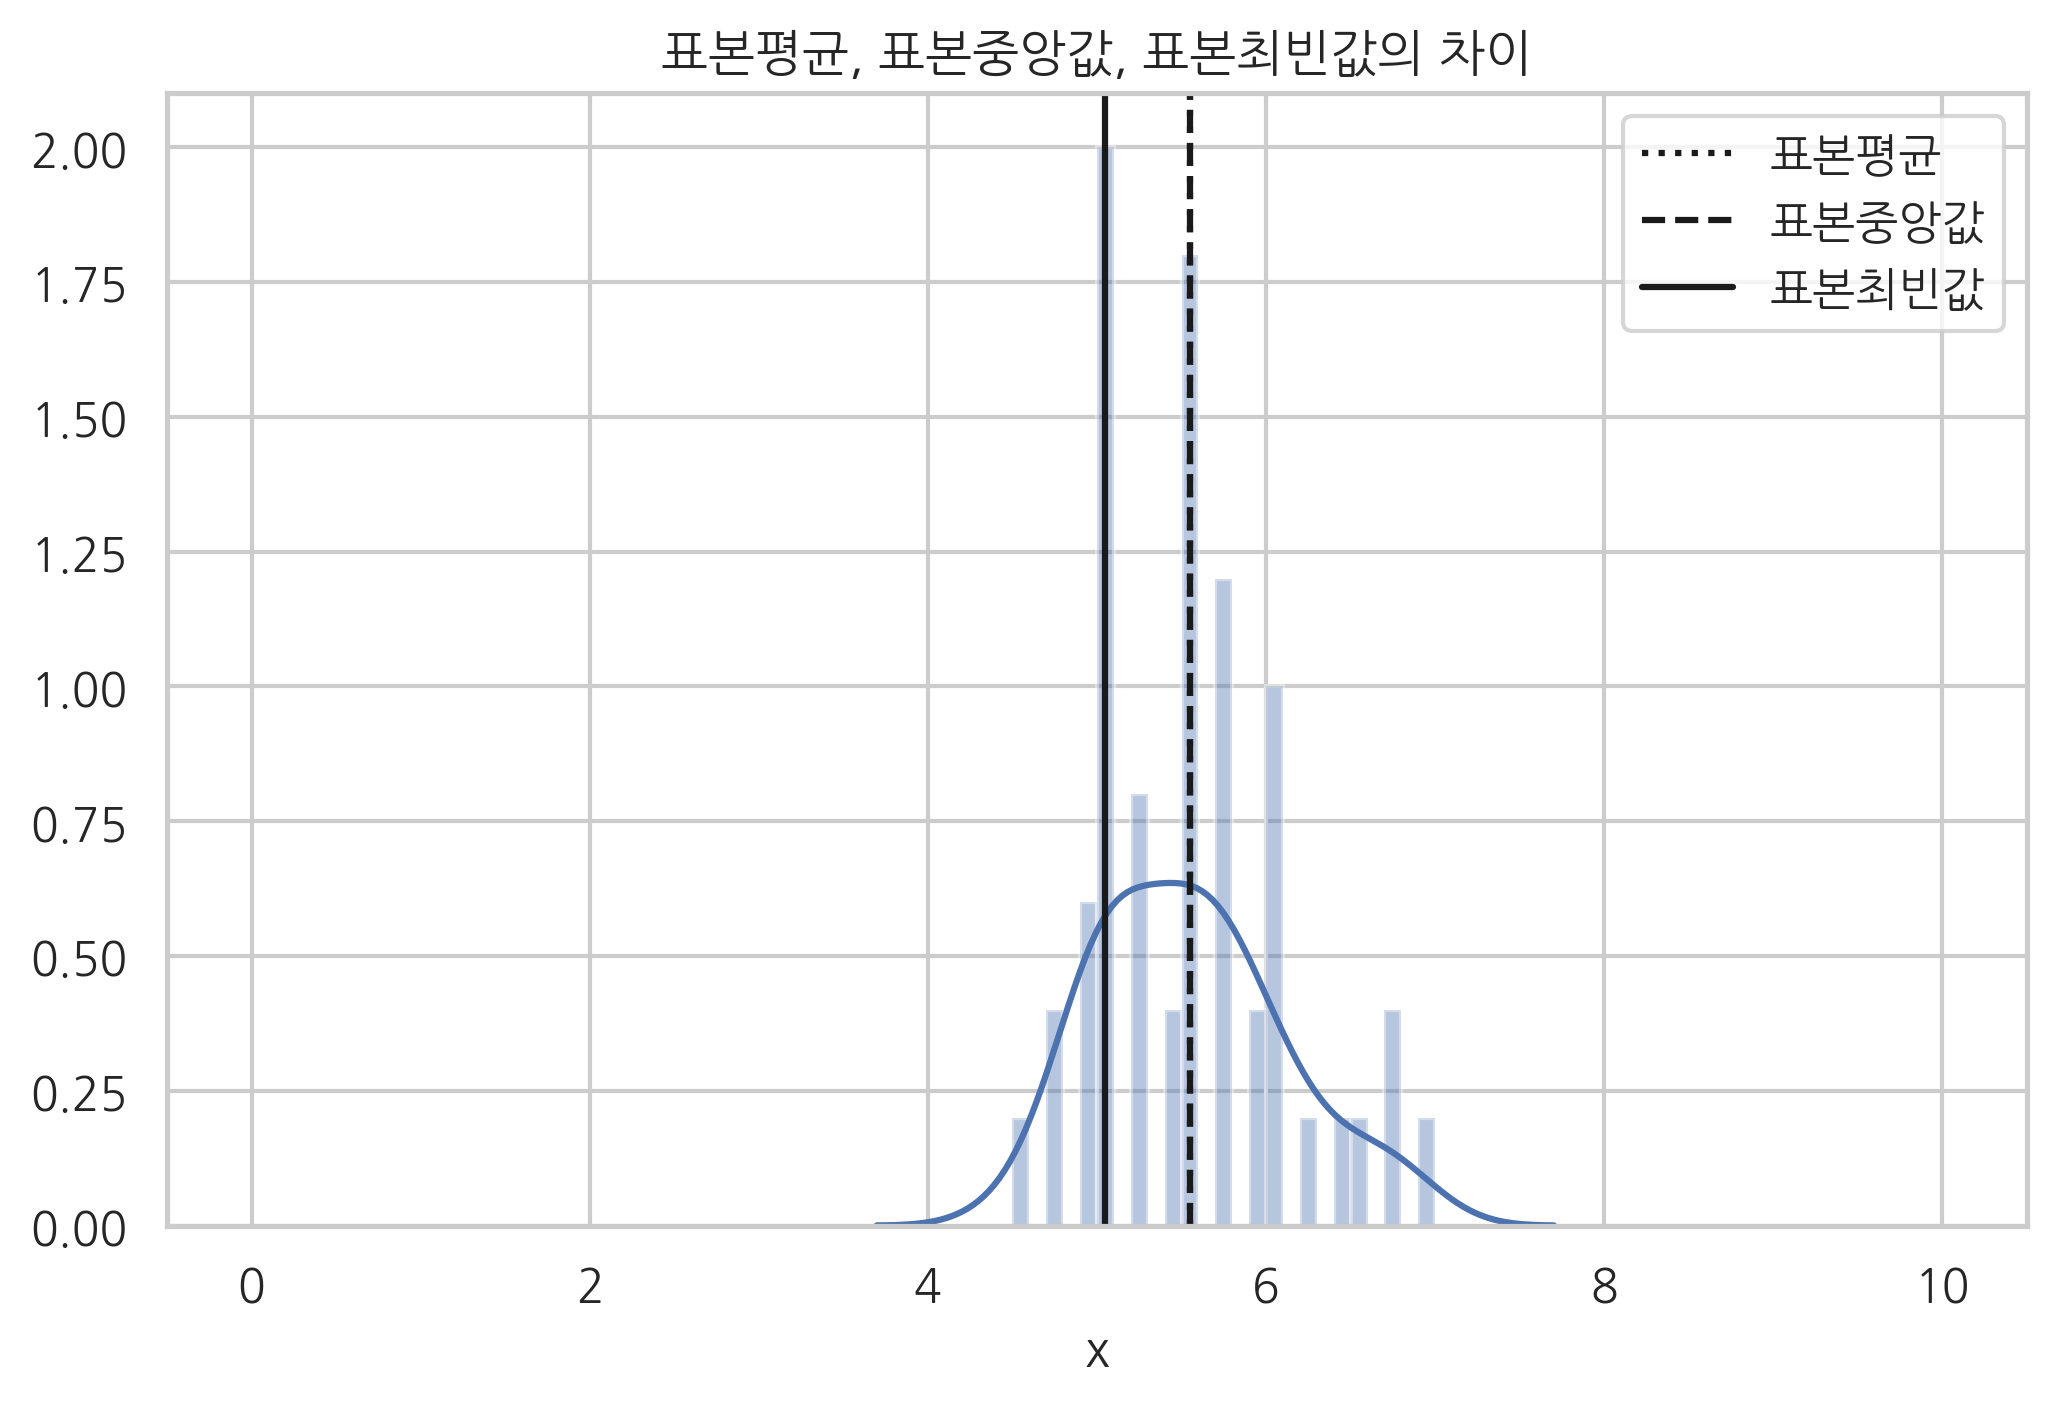

In [7]:
sample_statistics(x, 100)

#### 연습 문제 7.1.3의 답

(1) 표본평균은 약 0.038%, 표본중앙값은 약 0.075%, 표본최빈값은 약 0.090%

구간이 100개일 때
표본평균 0.00037787196748965957
표본중앙값 0.0007506772793850617
표본최빈값 0.000899999999999998


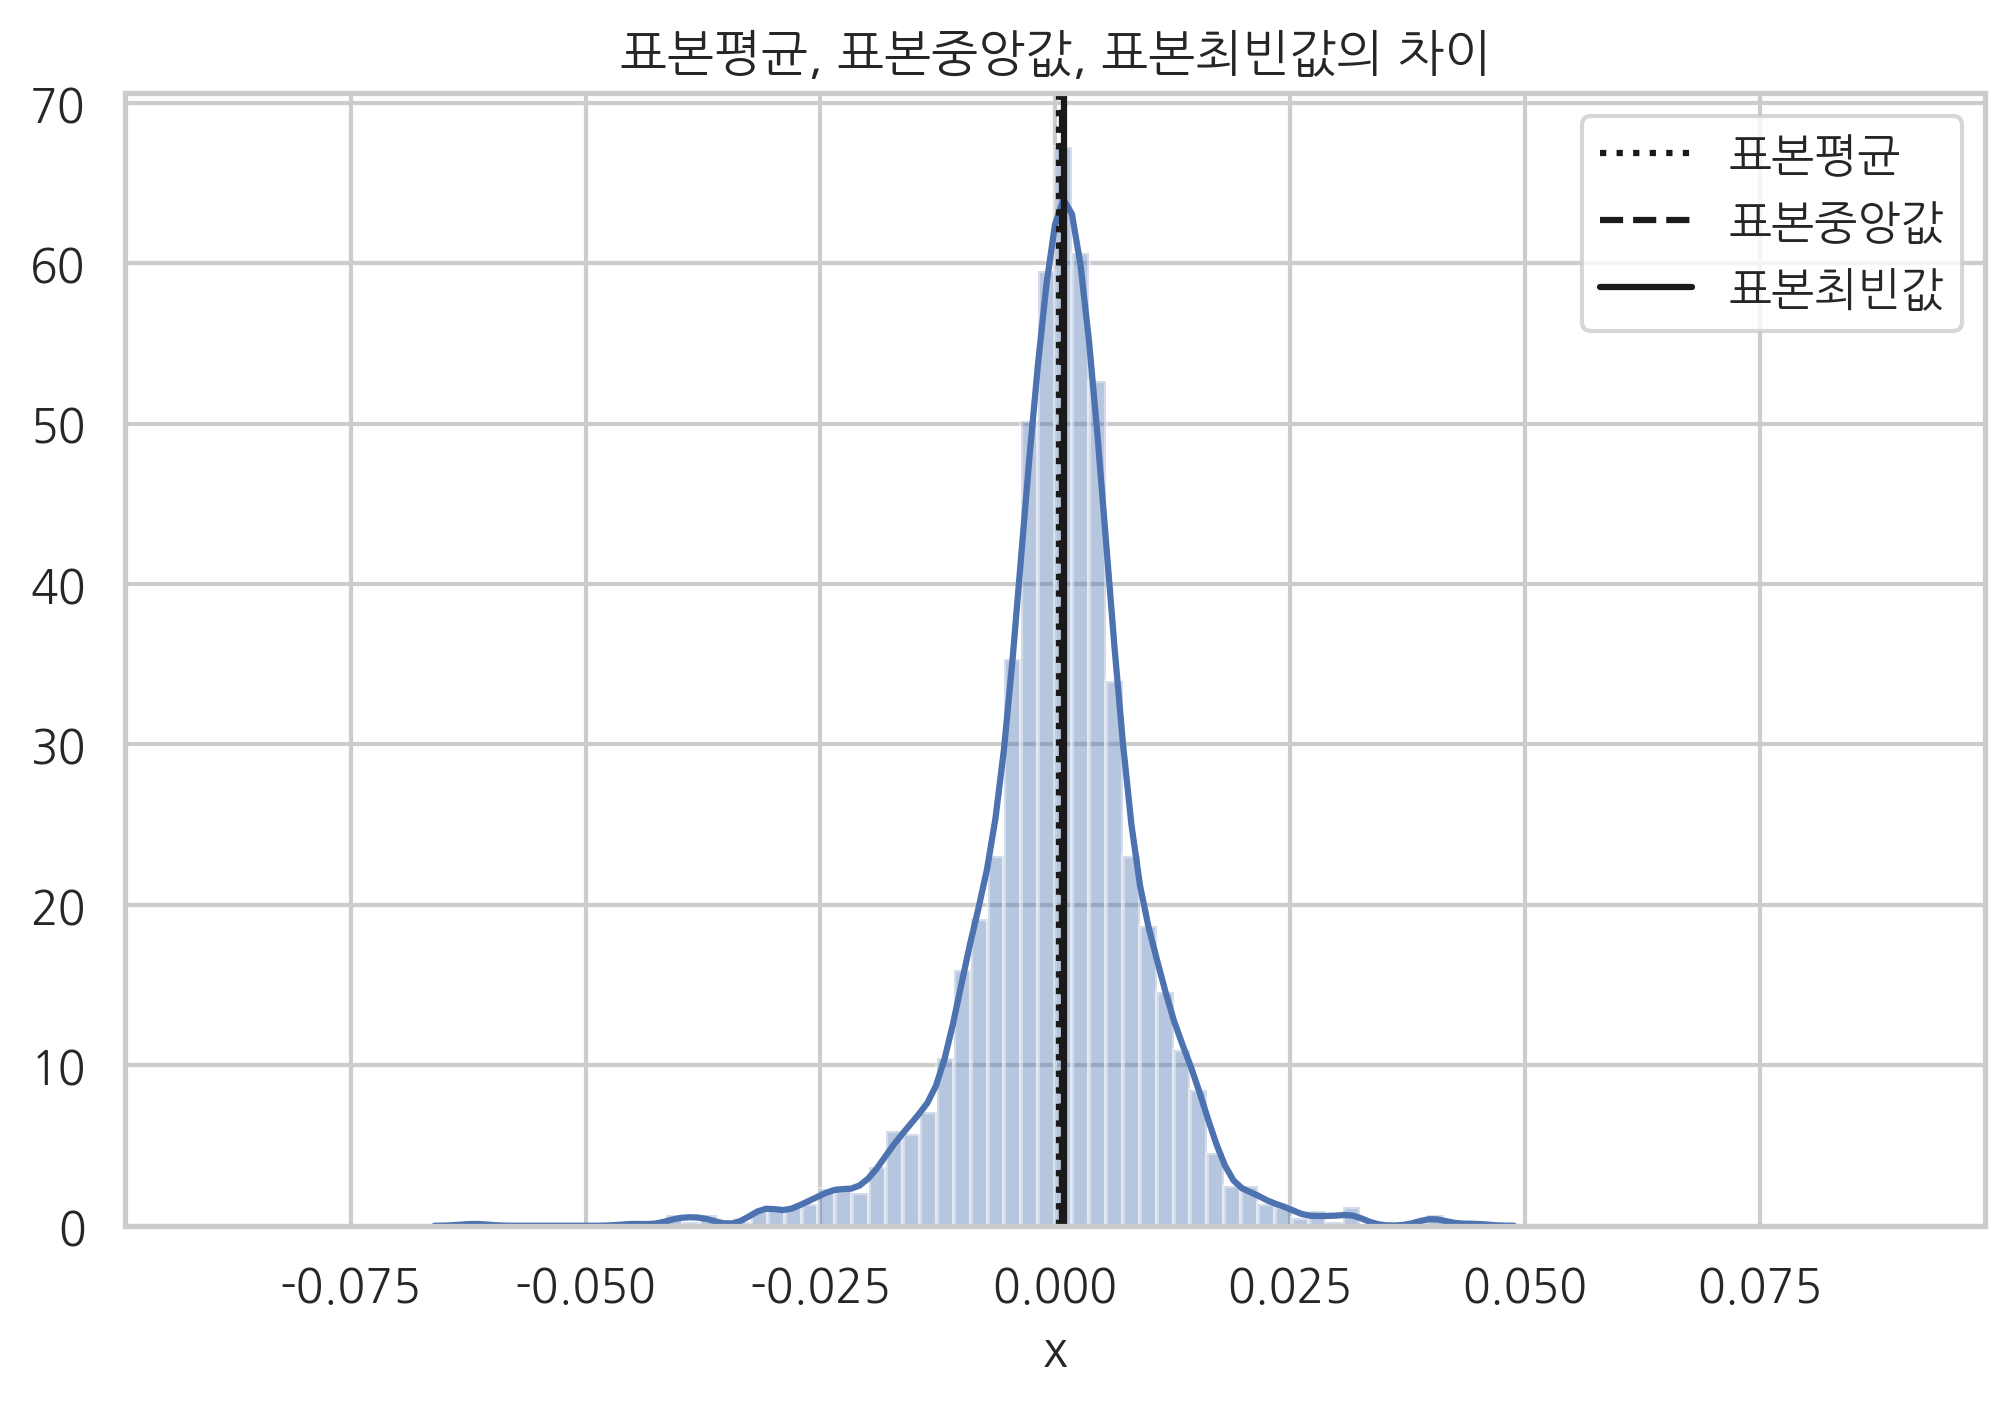

In [8]:
import pandas_datareader.data as web

df = web.DataReader("DJCA", data_source='fred').dropna()["DJCA"]
r = np.log(df / df.shift(1)).dropna().values

sample_statistics(r, 100, -0.09, 0.09)

(2) 변동성은 약 14.28%

In [9]:
volatility = np.std(r) * np.sqrt(256) * 100
volatility

14.273856219158908

#### 연습 문제 7.1.4의 답

5개의 확률변수가 있다. 꽃잎의 길이, 꽃잎의 폭, 꽃받침의 길이, 꽃받침의 폭은 연속확률변수고 종은 이산확률변수다.

#### 연습 문제 7.2.1의 답

$$
\begin{align}
\text{E}[X] = X(H)p(H) + X(T)p(T) = 1 \cdot \frac{1}{2} + 0 \cdot \frac{1}{2} = \frac{1}{2}
\tag{A.7.1}
\end{align}
$$

#### 연습 문제 7.2.2의 답

표본평균을 구하는 공식에서는 가능한 값이 아니라 선택된 표본값을 더한다. 표본값이 선택되는 빈도은 확률에 비례하기 때문에 확률이 높은 표본값은 여러번 선택된다. 따라서 확률 가중치를 곱할 필요가 없다. 

#### 연습 문제 7.2.3의 답

확률변수 $Y$의 기댓값은 함수 $yp(y)$의 면적과 같다. 위 그림에서 $yp(y)$의 면적은 삼각형과 사각형의 면적공식을 사용하여 다음과 같이 구한다.

$$
\begin{align}
\frac{1}{2} \cdot 180 \cdot 0.35 + \frac{1}{2} \cdot 180 \cdot 0.175 + 180 \cdot 0.175 = 78.74
\tag{A.7.2}
\end{align}
$$

#### 연습 문제 7.2.4의 답

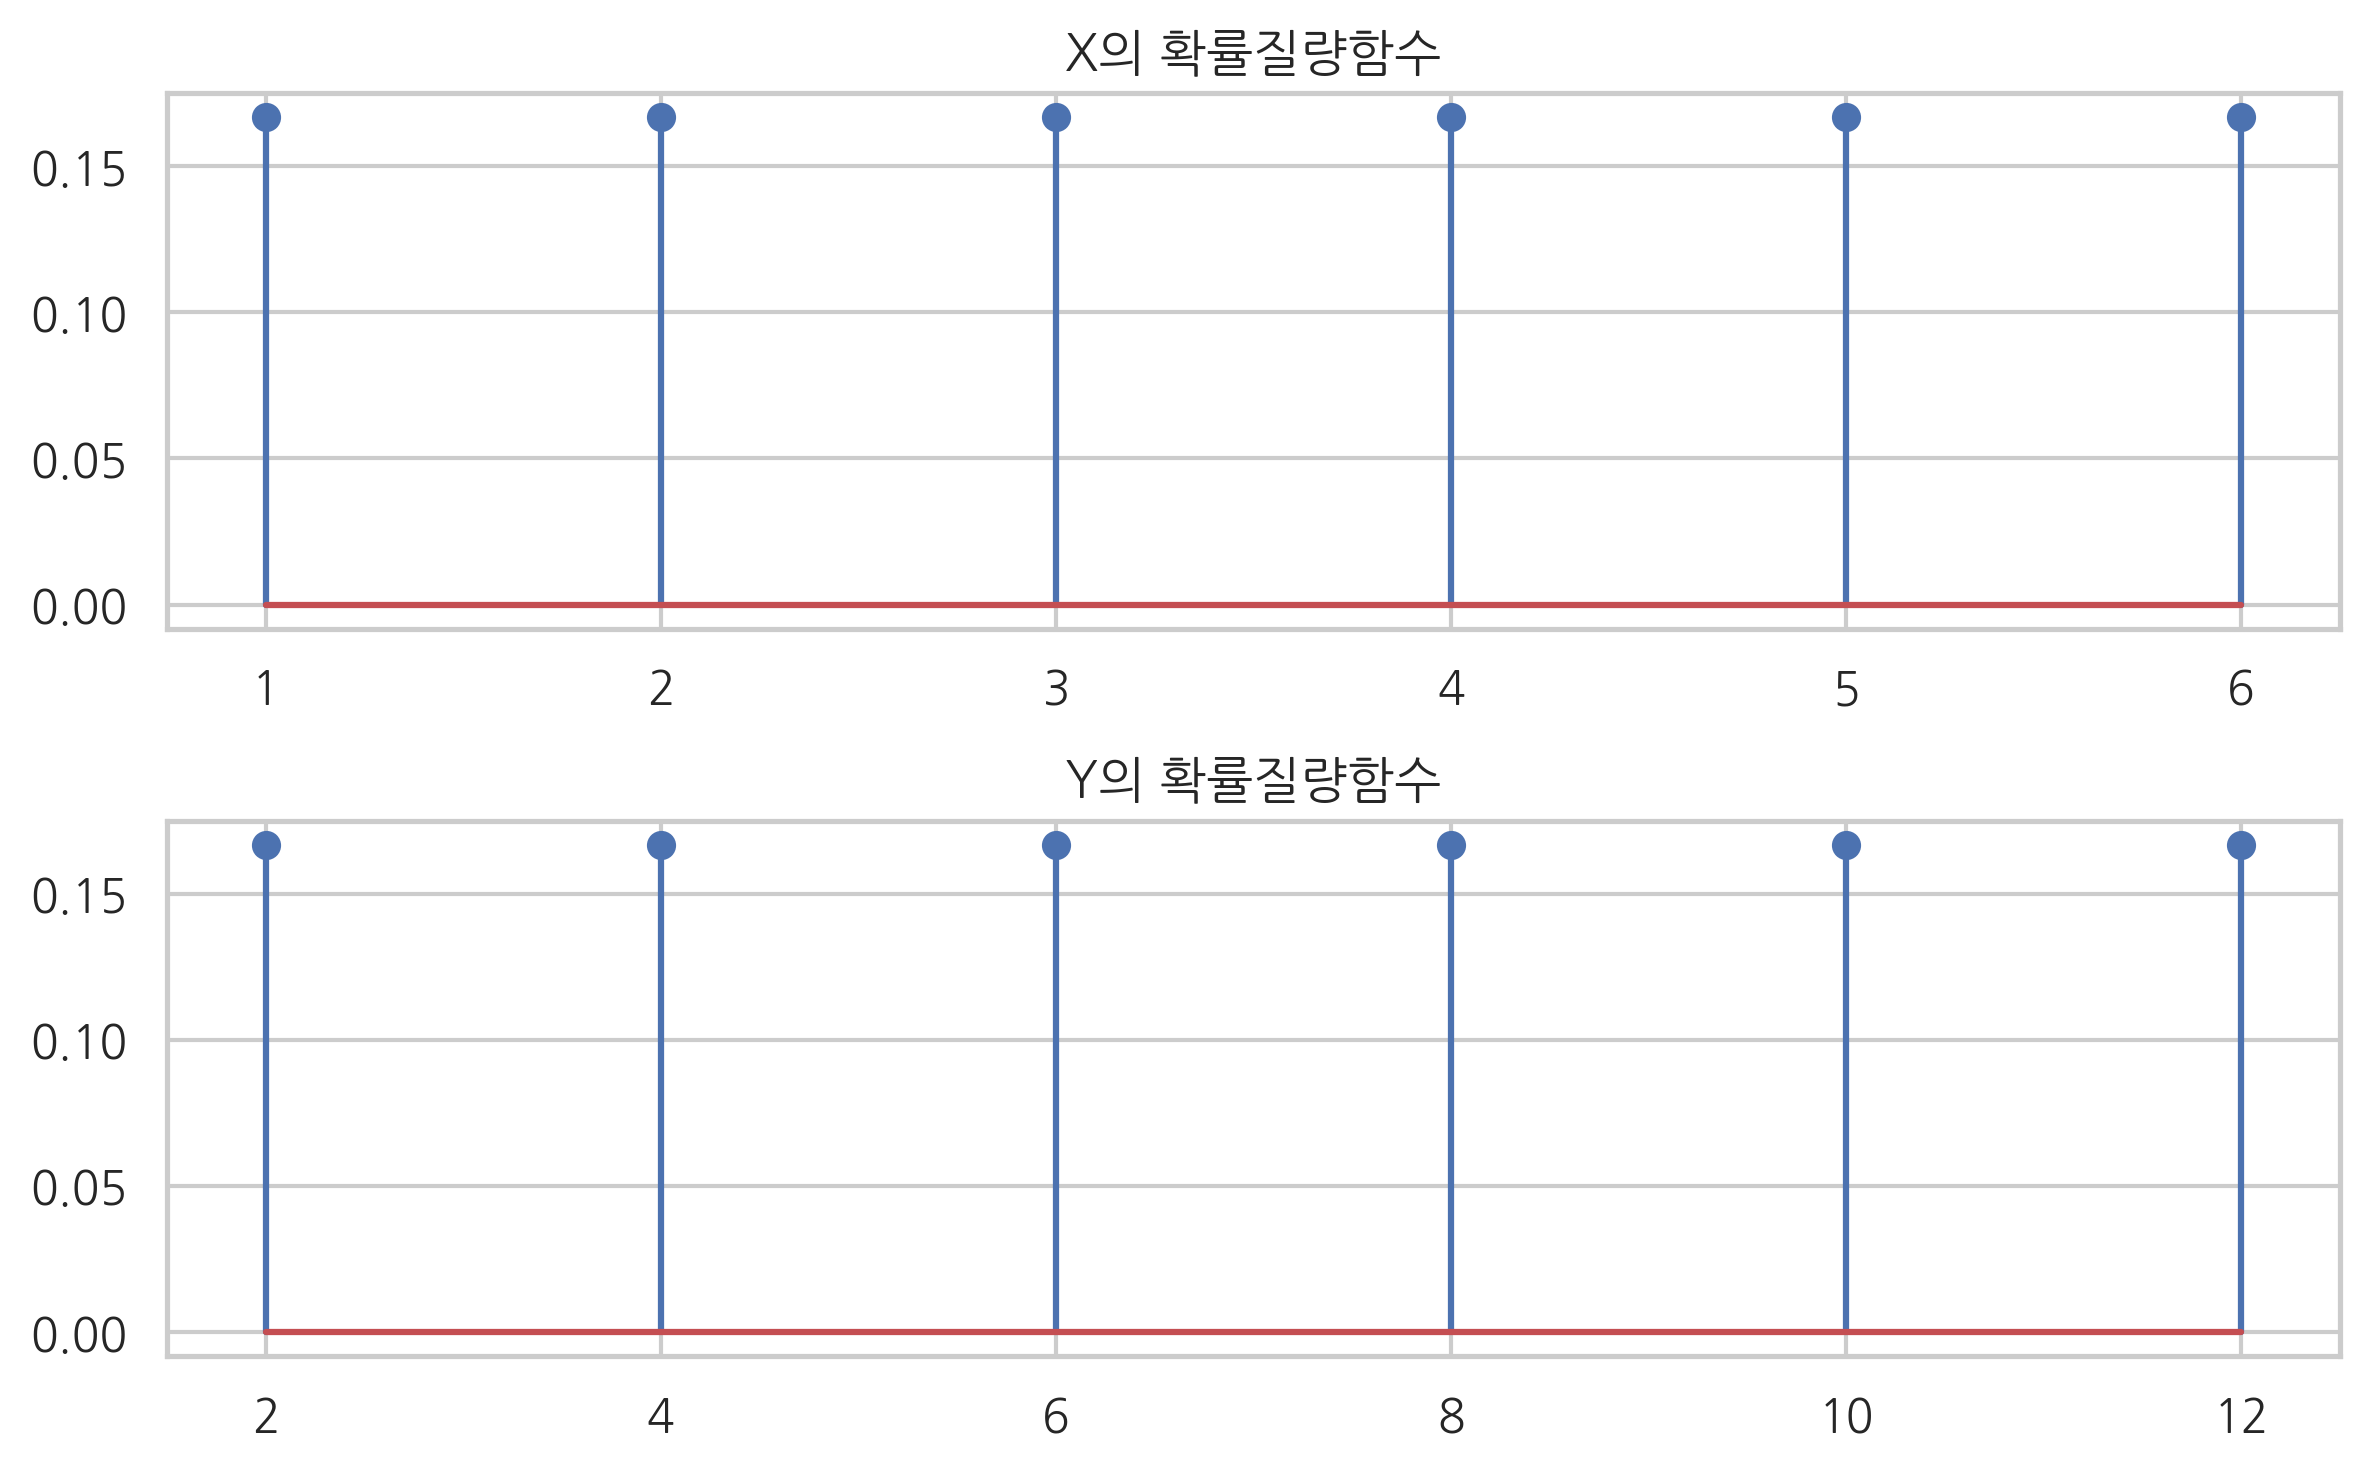

In [10]:
plt.subplot(211)
x = np.linspace(1, 6, 6)
px = np.ones_like(x) / 6
plt.stem(x, px)
plt.title("X의 확률질량함수")
plt.subplot(212)
x = x * 2
px = np.ones_like(x) / 6
plt.stem(x, px)
plt.title("Y의 확률질량함수")
plt.tight_layout()
plt.show()

#### 연습 문제 7.2.5의 답

In [11]:
from itertools import product
from collections import Counter

x1 = np.linspace(1, 6, 6)
px1 = np.ones_like(x1) / 6
x2 = np.linspace(1, 6, 6)
px2 = np.ones_like(x1) / 6

c = Counter([sum(x) for x in product(x1, x2)])
y = list(c.keys())
py = np.array(list(c.values())) / np.sum([v for v in c])
py

array([0.01298701, 0.02597403, 0.03896104, 0.05194805, 0.06493506,
       0.07792208, 0.06493506, 0.05194805, 0.03896104, 0.02597403,
       0.01298701])

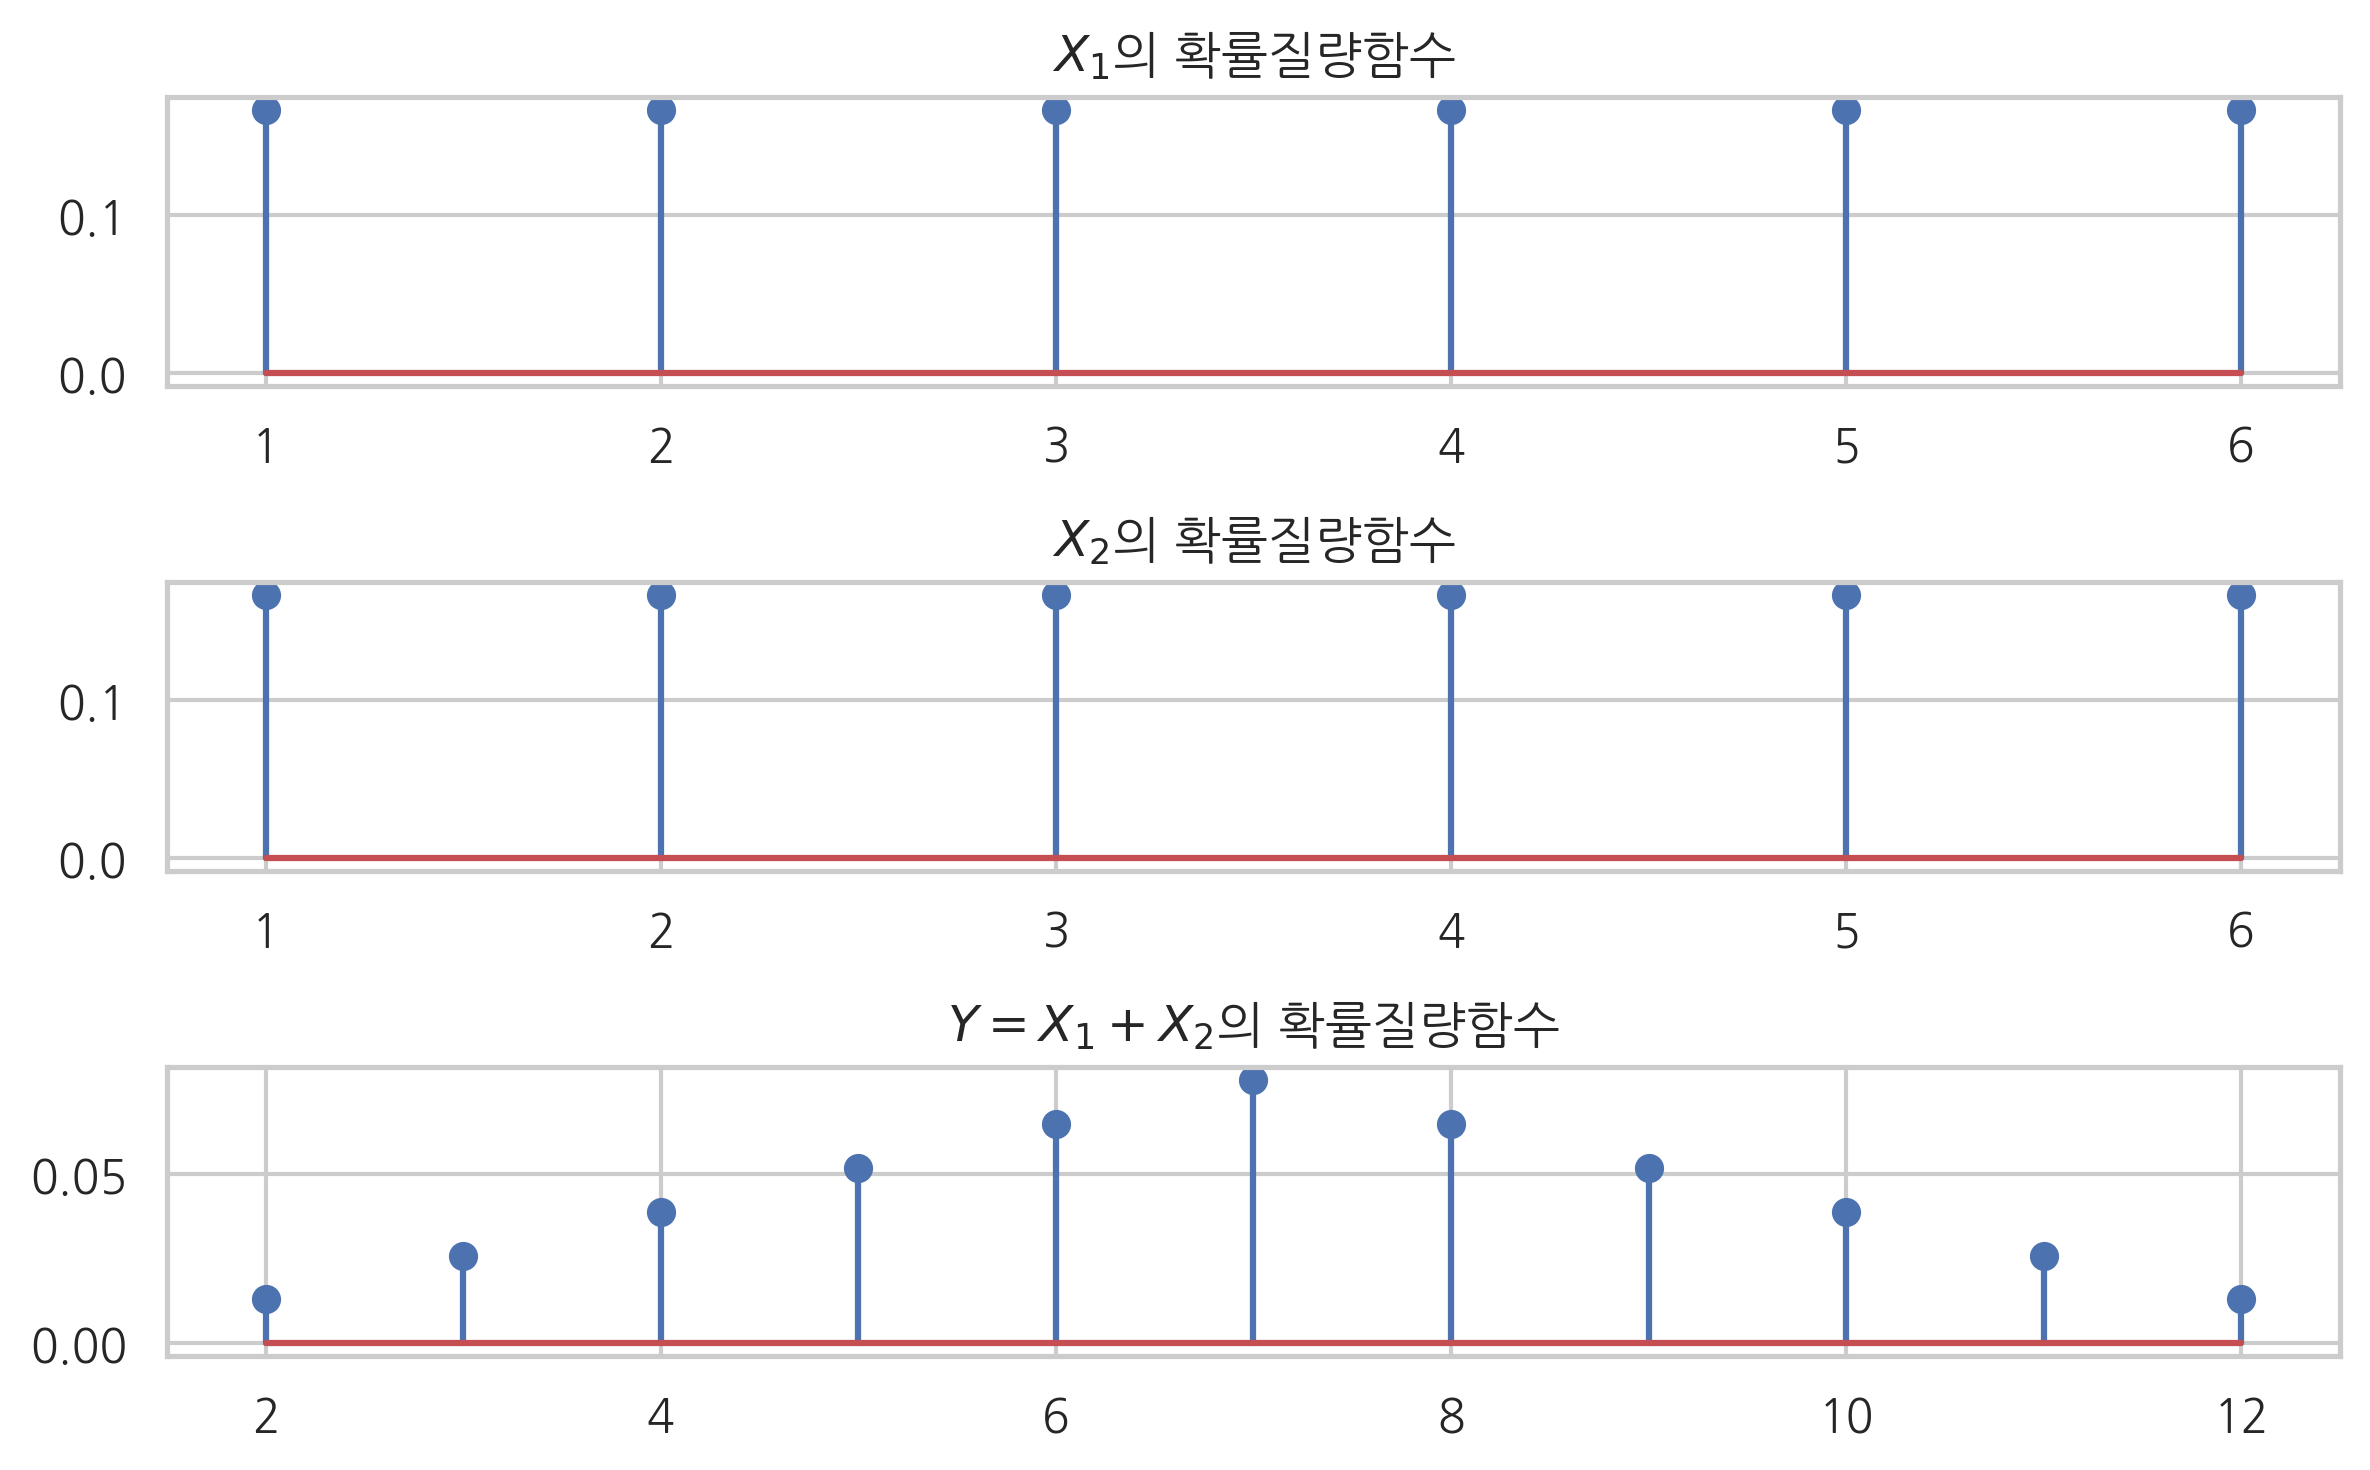

In [12]:
plt.subplot(311)
plt.stem(x1, px1)
plt.title("$X_1$의 확률질량함수")
plt.subplot(312)
plt.stem(x2, px2)
plt.title("$X_2$의 확률질량함수")
plt.subplot(313)
plt.stem(y, py)
plt.title("$Y=X_1+X_2$의 확률질량함수")
plt.tight_layout()
plt.show()

#### 연습 문제 7.2.6의 답

(편향)샘플분산도 확률적인 데이터다. 다음과 같이 정의할 수 있다.

$$
\begin{align}
\bar{S}^2 = \dfrac{1}{N}\sum_{i=1}^{N} (X_i - \bar{X})^2 = \dfrac{1}{N}\sum_{i=1}^{N} \left(X_i - \dfrac{1}{N}\sum_{i=1}^{N} X_i \right)^2
\tag{A.7.3}
\end{align}
$$

#### 연습 문제 7.3.1의 답

(1) 예: 사람의 지능과 몸무게

(2) 예: 사람의 키와 몸무게

#### 연습 문제 7.3.2의 답

In [13]:
np.random.seed(0)
x1 = np.random.normal(size=100)
x2 = np.random.normal(size=100)
x = x1 + x2

print("X1의 표본분산 =", np.var(x1))
print("X2의 표본분산 =", np.var(x2))
print("X1+X2의 표본분산 =", np.var(x))

X1의 표본분산 = 1.0158266192149312
X2의 표본분산 = 1.0705357955882409
X1+X2의 표본분산 = 2.3193898587605104


#### 연습 문제 7.3.3의 답

In [14]:
np.random.seed(0)

# (1) 100개 표본의 50개 집합
x = np.random.normal(size=(100, 50)) 

# (2) 50개 집합의 표본평균
x_means = x.mean(axis=0)  

# (3) 표본평균의 표본분산
std_xbar = x_means.std() 

# (4) x1의 표본분산
std_x1 = x[:, 0].std() 

# 표본평균의 표본분산과 x1의 표본분산의 비율
std_x1 / std_xbar

9.168983486145807

#### 연습 문제 7.4.1의 답

(1) 0.02

(2) 0

(3) (C, C)

#### 연습 문제 7.4.2의 답

(1) 0.08

(2) 0.18

#### 연습 문제 7.4.3의 답

(1) B

(2) C

#### 연습 문제 7.4.4의 답

(1) (70, 170)

(2) 70

(3) 60

#### 연습 문제 7.5.1의 답

In [15]:
from sklearn.datasets import load_iris
X = load_iris().data
x1 = X[:, 0]  # 꽃받침의 길이
x2 = X[:, 1]  # 꽃받침의 폭
x3 = X[:, 2]  # 꽃잎의 길이
x4 = X[:, 3]  # 꽃잎의 폭

In [16]:
# (1) 꽃받침의 길이와 꽃받침의 폭 사이의 상관계수
sp.stats.pearsonr(x1, x2)[0]

-0.11756978413300204

In [17]:
# (2) 꽃잎의 길이와 꽃잎의 폭 사이의 상관계수
sp.stats.pearsonr(x3, x4)[0]

0.9628654314027961

In [18]:
# (3) 꽃받침의 폭과 꽃잎의 폭 사이의 상관계수
sp.stats.pearsonr(x2, x4)[0]

-0.3661259325364391

#### 연습 문제 7.5.2의 답

In [19]:
# (1) 10개 데이터의 무작위 벡터 생성
np.random.seed(0)
x1 = np.random.normal(size=10)
x2 = np.random.normal(size=10)

# (2) 상관계수 계산
sp.stats.pearsonr(x1, x2)[0]

0.07172529242772133

In [20]:
# (3) 10000개 데이터의 무작위 벡터 생성 및 상관계수
x1 = np.random.normal(size=10000)
x2 = np.random.normal(size=10000)
sp.stats.pearsonr(x1, x2)[0]

-0.007638623904848813

(4) 이론적 상관계수는 확률변수에서 나올 수 있는 모든 경우를 고려한 것이지만 표본상관계수는 유한한 표본을 대상으로 한 것이므로 이론적 상관계수와 일치하지 않을 수 있다.

#### 연습 문제 7.5.3의 답

$$
\begin{align}
\begin{aligned}
S 
&= \dfrac{1}{N}\sum_{i=1}^N (x_i-\bar{x})(x_i-\bar{x})^T \\
&= \dfrac{1}{N} \left( (x_1-\bar{x})(x_1-\bar{x})^T + \cdot + x_N-\bar{x})(x_N-\bar{x})^T  \right) \\
&= \dfrac{1}{N} 
\begin{bmatrix} x_1-\bar{x} & \cdots & x_N-\bar{x} \end{bmatrix} 
\begin{bmatrix} (x_1-\bar{x})^T \\ \vdots \\ (x_N-\bar{x})^T \end{bmatrix} \\
&= \dfrac{1}{N} 
\Big(
\begin{bmatrix} x_1 & \cdots & x_N \end{bmatrix} -
\begin{bmatrix} \bar{x} & \cdots & \bar{x} \end{bmatrix} 
\Big)
\left(
\begin{bmatrix} x_1^T \\ \vdots \\ x_M^T \end{bmatrix} -
\begin{bmatrix} \bar{x}^T \\ \vdots \\ \bar{x}^T \end{bmatrix}
\right) \\
&= \dfrac{1}{N} 
(X^T - \bar{x}\mathbf{1_N}^T)
(X - \mathbf{1_N}\bar{x}^T) \\
&= \dfrac{1}{N} X_0^TX_0
\end{aligned}
\tag{A.7.4}
\end{align}
$$

#### 연습 문제 7.5.4의 답

연습 문제 7.5.3의 공식을 사용한다.

In [21]:
N, M = X.shape
xbar = 1/ N * (np.ones((1, N)) @ X).T
X0 = X - np.ones((N, 1)) @ xbar.T
S = 1 / N * X0.T @ X0
S

array([[ 0.68112222, -0.04215111,  1.26582   ,  0.51282889],
       [-0.04215111,  0.18871289, -0.32745867, -0.12082844],
       [ 1.26582   , -0.32745867,  3.09550267,  1.286972  ],
       [ 0.51282889, -0.12082844,  1.286972  ,  0.57713289]])

또는 넘파이 `cov()` 함수를 사용할 수도 있다.

In [22]:
np.cov(X.T, ddof=0)

array([[ 0.68112222, -0.04215111,  1.26582   ,  0.51282889],
       [-0.04215111,  0.18871289, -0.32745867, -0.12082844],
       [ 1.26582   , -0.32745867,  3.09550267,  1.286972  ],
       [ 0.51282889, -0.12082844,  1.286972  ,  0.57713289]])

#### 연습 문제 7.6.1의 답

$$
\begin{align}
\begin{aligned}
\text{E}[(Y - \text{E}[Y \vert X])g(X)] 
&= \text{E}[(Yg(X) - g(X)\text{E}[Y \vert X]] \\
&= \text{E}[Yg(X)] - \text{E}[g(X)\text{E}[Y \vert X]] \\
&= \text{E}[Yg(X)] - g(X)\text{E}[\text{E}[Y \vert X]] \\
&= \text{E}[Yg(X)] - g(X)\text{E}[Y] \\
&= \text{E}[Yg(X)] - \text{E}[Yg(X)] = 0
\end{aligned}
\tag{A.7.5}
\end{align}
$$